# Análisis y Validación de Excel - Seed Pablo Neruda

Este notebook permite explorar, analizar y visualizar los datos del archivo Excel de semilla, así como identificar problemas de validación.

## 1. Configuración e Importación de Librerías

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from config import HOJAS_REQUERIDAS, COLUMNAS_REQUERIDAS

# Configuración de visualización
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Cargar Excel y Explorar Estructura

In [72]:
# Cargar archivo Excel
archivo_excel = "seed_Jose-Asuncion-Silva.xlsx"
excel_file = pd.ExcelFile(archivo_excel)

# Mostrar todas las hojas con conteo de filas
print("HOJAS EN EL EXCEL:")
print("=" * 60)
for i, hoja in enumerate(excel_file.sheet_names, 1):
    try:
        df = pd.read_excel(excel_file, sheet_name=hoja, header=1)
        print(f"{i:2}. {hoja:30} → {len(df):5} filas")
    except:
        print(f"{i:2}. {hoja:30} → Error al leer")
print("=" * 60)

HOJAS EN EL EXCEL:
 1. Instrucciones                  →     7 filas
 2. Sede principal                 →     7 filas
 3. Sedes                          →     9 filas
 4. Escala de calificaciones       →     3 filas
 5. Coordinadores                  →    10 filas
 6. Cursos académicos              →     1 filas
 7. Administradores                →     4 filas
 8. Periodos                       →     4 filas
 9. Grados                         →    12 filas
10. Grupos                         →    66 filas
11. Áreas                          →    11 filas
12. Asignaturas                    →   156 filas
13. Profesores                     →   117 filas
14. Clases                         →   997 filas
15. Matrículas                     →     0 filas
16. Calificaciones anuales         →   997 filas
17. Checklist de entrega Sedefy    →    10 filas


## 3. Explorar Columnas de Cada Hoja

Selecciona una hoja para ver su estructura detallada:

In [73]:
# Cambiar el nombre de la hoja aquí
HOJA_A_EXPLORAR = "Calificaciones anuales"

df = pd.read_excel(archivo_excel, sheet_name=HOJA_A_EXPLORAR, header=1)

print(f"\n📋 HOJA: {HOJA_A_EXPLORAR}")
print("=" * 80)
print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

print("COLUMNAS Y TIPOS DE DATOS:")
print("-" * 80)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    valores_unicos = df[col].nunique()
    valores_nulos = df[col].isna().sum()
    print(f"{i:2}. {col:40} | {str(dtype):15} | {valores_unicos:5} únicos | {valores_nulos:5} nulos")

print("\n" + "=" * 80)
print("\nPRIMERAS 5 FILAS:")
df.head()


📋 HOJA: Calificaciones anuales

Dimensiones: 997 filas × 10 columnas

COLUMNAS Y TIPOS DE DATOS:
--------------------------------------------------------------------------------
 1. Número de documento del estudiante       | float64         |     0 únicos |   997 nulos
 2. Nombre del estudiante                    | float64         |     0 únicos |   997 nulos
 3. Grado                                    | float64         |     0 únicos |   997 nulos
 4. Grupo                                    | float64         |     0 únicos |   997 nulos
 5. Nombre de la asignatura                  | float64         |     0 únicos |   997 nulos
 6. Año escolar                              | float64         |     0 únicos |   997 nulos
 7. Sede asignada                            | float64         |     0 únicos |   997 nulos
 8. Tipo de nota                             | float64         |     0 únicos |   997 nulos
 9. Promedio anual                           | float64         |     0 únicos |   997

,Número de documento del estudiante,Nombre del estudiante,Grado,Grupo,Nombre de la asignatura,Año escolar,Sede asignada,Tipo de nota,Promedio anual,Aprobó
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Análisis de Calificaciones Anuales - Errores Detectados

In [74]:
# Cargar hoja de calificaciones
df_calif = pd.read_excel(archivo_excel, sheet_name="Calificaciones anuales", header=1)

# Cargar hojas de referencia para validación
df_asignaturas = pd.read_excel(archivo_excel, sheet_name="Asignaturas", header=1)
df_cursos = pd.read_excel(archivo_excel, sheet_name="Cursos académicos", header=1)
df_sedes = pd.read_excel(archivo_excel, sheet_name="Sedes", header=1)

# Crear listas de valores válidos
asignaturas_validas = df_asignaturas["Nombre de la asignatura"].unique().tolist()
cursos_validos = df_cursos["Nombre del año escolar"].unique().tolist()
sedes_validas = df_sedes["Nombre de la institución"].unique().tolist()

print("📊 DATOS DE REFERENCIA CARGADOS:")
print(f"  - Asignaturas válidas: {len(asignaturas_validas)}")
print(f"  - Cursos académicos válidos: {len(cursos_validos)}")
print(f"  - Sedes válidas: {len(sedes_validas)}")
print(f"\n  Total de calificaciones a validar: {len(df_calif):,}")

📊 DATOS DE REFERENCIA CARGADOS:
  - Asignaturas válidas: 26
  - Cursos académicos válidos: 1
  - Sedes válidas: 9

  Total de calificaciones a validar: 997


In [76]:
# Visualización de hojas 'Grados' y 'Grupos' para diagnóstico
print('\n📄 VISUALIZACIÓN: Grados y Grupos')
print('—' * 60)

# Grados
try:
    df_grados = pd.read_excel(archivo_excel, sheet_name='Grados', header=1)
    print('\nHOJA: Grados')
    print('Dimensiones:', df_grados.shape)
    print('\nTipos de columnas:')
    print(df_grados.dtypes)
    if 'Nivel' in df_grados.columns:
        print('\nDistribución de tipos en columna "Nivel":')
        print(df_grados['Nivel'].map(type).value_counts())
    display(df_grados.head(30))
except Exception as e:
    print('Error leyendo Grados:', e)

# Grupos
try:
    df_grupos = pd.read_excel(archivo_excel, sheet_name='Grupos', header=1)
    print('\nHOJA: Grupos')
    print('Dimensiones:', df_grupos.shape)
    print('\nTipos de columnas:')
    print(df_grupos.dtypes)

    col_name = 'Nombre del grupo'
    if col_name in df_grupos.columns:
        print('\nDistribución de tipos en columna "Nombre del grupo":')
        print(df_grupos[col_name].map(type).value_counts())

        # Filas donde el nombre del grupo no es str (ej. números, timestamps)
        mask_no_str = df_grupos[col_name].apply(lambda x: not isinstance(x, str))
        print(f"\nFilas con '{col_name}' no-str: {mask_no_str.sum()}")
        if mask_no_str.sum() > 0:
            display(df_grupos[mask_no_str].head(30))

    display(df_grupos.head(50))

    # También mostrar cómo queda si forzamos lectura como texto
    df_grupos_text = pd.read_excel(archivo_excel, sheet_name='Grupos', header=1, dtype=str).fillna('')
    print('\n(Comparación) Lectura con dtype=str:')
    print(df_grupos_text.dtypes)
    display(df_grupos_text.head(30))

except Exception as e:
    print('Error leyendo Grupos:', e)



📄 VISUALIZACIÓN: Grados y Grupos
————————————————————————————————————————————————————————————

HOJA: Grados
Dimensiones: (12, 4)

Tipos de columnas:
Nivel                         int64
Nombre del grado             object
Tipo de grado                object
¿Último grado culminante?    object
dtype: object

Distribución de tipos en columna "Nivel":
Nivel
<class 'int'>    12
Name: count, dtype: int64


,Nivel,Nombre del grado,Tipo de grado,¿Último grado culminante?
0,0,Preescolar,EDUCACION_PREESCOLAR,Sí
1,1,Primero,EDUCACION_BASICA_PRIMARIA,No
2,2,Segundo,EDUCACION_BASICA_PRIMARIA,No
3,3,Tercero,EDUCACION_BASICA_PRIMARIA,No
4,4,Cuarto,EDUCACION_BASICA_PRIMARIA,No
5,5,Quinto,EDUCACION_BASICA_PRIMARIA,Sí
6,6,Sexto,EDUCACION_BASICA_SECUNDARIA,No
7,7,Septimo,EDUCACION_BASICA_SECUNDARIA,No
8,8,Octavo,EDUCACION_BASICA_SECUNDARIA,No
9,9,Noveno,EDUCACION_BASICA_SECUNDARIA,Sí



HOJA: Grupos
Dimensiones: (66, 4)

Tipos de columnas:
Nombre del grupo      int64
Nombre del grado     object
Sedes asociadas      object
Capacidad           float64
dtype: object

Distribución de tipos en columna "Nombre del grupo":
Nombre del grupo
<class 'int'>    66
Name: count, dtype: int64

Filas con 'Nombre del grupo' no-str: 66


,Nombre del grupo,Nombre del grado,Sedes asociadas,Capacidad
0,1,Preescolar,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
1,101,Primero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
2,201,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
3,202,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
4,301,Tercero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
5,401,Cuarto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
6,501,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
7,502,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
8,601,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
9,602,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN


,Nombre del grupo,Nombre del grado,Sedes asociadas,Capacidad
0,1,Preescolar,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
1,101,Primero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
2,201,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
3,202,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
4,301,Tercero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
5,401,Cuarto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
6,501,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
7,502,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
8,601,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN
9,602,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,NaN



(Comparación) Lectura con dtype=str:
Nombre del grupo    object
Nombre del grado    object
Sedes asociadas     object
Capacidad           object
dtype: object


,Nombre del grupo,Nombre del grado,Sedes asociadas,Capacidad
0,001,Preescolar,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
1,101,Primero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
2,201,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
3,202,Segundo,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
4,301,Tercero,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
5,401,Cuarto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
6,501,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
7,502,Quinto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
8,601,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,
9,602,Sexto,INSTITUCION EDUCATIVA RURAL JOSE ASUNCION SILVA,


### 4.1 Error: Asignaturas Inválidas

In [75]:
# Identificar registros con asignaturas inválidas
registros_invalidos = df_calif[
    df_calif["Nombre de la asignatura"].notna() & 
    ~df_calif["Nombre de la asignatura"].isin(asignaturas_validas)
]

# Estadísticas
total_registros = len(df_calif[df_calif["Nombre de la asignatura"].notna()])
count_invalidos = len(registros_invalidos)
porcentaje = (count_invalidos / total_registros) * 100

# Asignaturas inválidas únicas
asignaturas_invalidas = registros_invalidos["Nombre de la asignatura"].value_counts()

print("🔴 ASIGNATURAS INVÁLIDAS DETECTADAS:")
print("=" * 80)
print(f"Total de registros con asignaturas inválidas: {count_invalidos:,} ({porcentaje:.1f}%)")
print(f"Cantidad de asignaturas inválidas únicas: {len(asignaturas_invalidas)}")
print("\n" + "-" * 80)
print("TOP 20 ASIGNATURAS INVÁLIDAS MÁS FRECUENTES:")
print("-" * 80)
print(asignaturas_invalidas.head(20))

print("\n" + "=" * 80)
print("\nASIGNATURAS VÁLIDAS EN EL SISTEMA:")
print("-" * 80)
for i, asig in enumerate(sorted(asignaturas_validas), 1):
    print(f"{i:2}. {asig}")

ZeroDivisionError: division by zero

### 4.2 Visualización: Distribución de Asignaturas Inválidas

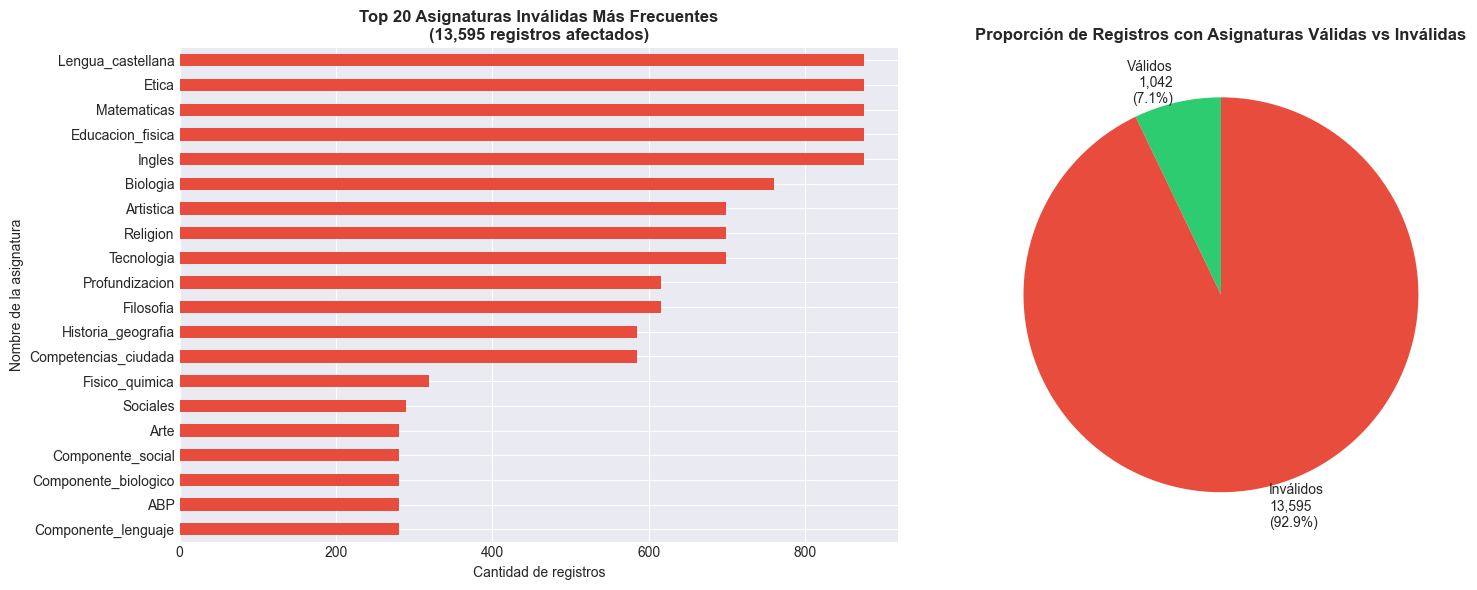

In [ ]:
# Gráfico de barras: Top 20 asignaturas inválidas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 20 asignaturas inválidas
top_20 = asignaturas_invalidas.head(20)
top_20.plot(kind='barh', ax=ax1, color='#e74c3c')
ax1.set_xlabel('Cantidad de registros')
ax1.set_title(f'Top 20 Asignaturas Inválidas Más Frecuentes\n({count_invalidos:,} registros afectados)', 
              fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Gráfico 2: Proporción válidos vs inválidos
datos_pie = [total_registros - count_invalidos, count_invalidos]
labels = [f'Válidos\n{total_registros - count_invalidos:,}\n({100-porcentaje:.1f}%)', 
          f'Inválidos\n{count_invalidos:,}\n({porcentaje:.1f}%)']
colors = ['#2ecc71', '#e74c3c']
ax2.pie(datos_pie, labels=labels, colors=colors, autopct='', startangle=90)
ax2.set_title('Proporción de Registros con Asignaturas Válidas vs Inválidas', 
              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3 Error: Años Escolares Inválidos

In [ ]:
# Validar años escolares
años_en_excel = df_calif["Año escolar"].unique()
años_invalidos = [año for año in años_en_excel if pd.notna(año) and año not in cursos_validos]

print("🔴 AÑOS ESCOLARES:")
print("=" * 60)
print(f"Años válidos en el sistema: {cursos_validos}")
print(f"Años encontrados en el Excel: {list(años_en_excel)}")
print(f"\nAños INVÁLIDOS: {años_invalidos}")

if años_invalidos:
    registros_año_invalido = df_calif[df_calif["Año escolar"].isin(años_invalidos)]
    print(f"Registros afectados: {len(registros_año_invalido):,}")
    print(f"\nDistribución por año inválido:")
    print(df_calif[df_calif["Año escolar"].isin(años_invalidos)]["Año escolar"].value_counts())

🔴 AÑOS ESCOLARES:
Años válidos en el sistema: [2026]
Años encontrados en el Excel: [np.int64(2025)]

Años INVÁLIDOS: [np.int64(2025)]
Registros afectados: 14,637

Distribución por año inválido:
Año escolar
2025    14637
Name: count, dtype: int64


### 4.4 Análisis de Tipos de Nota y Promedios

In [ ]:
# Análisis de tipos de nota
print("📊 ANÁLISIS DE TIPOS DE NOTA:")
print("=" * 60)
print("\nDistribución de tipos de nota:")
print(df_calif["Tipo de nota"].value_counts())

print("\n" + "-" * 60)
print("Valores únicos en 'Tipo de nota':")
for tipo in df_calif["Tipo de nota"].unique():
    print(f"  - {tipo}")

# Validar promedios para notas cuantitativas
df_cuantitativa = df_calif[df_calif["Tipo de nota"] == "Cuantitativa (Números)"]
print(f"\n" + "=" * 60)
print(f"Registros con notas cuantitativas: {len(df_cuantitativa):,}")

if len(df_cuantitativa) > 0:
    print("\nEstadísticas de promedios cuantitativos:")
    print(df_cuantitativa["Promedio anual"].describe())
    
    # Verificar promedios fuera de rango
    promedios = pd.to_numeric(df_cuantitativa["Promedio anual"], errors='coerce')
    fuera_rango = df_cuantitativa[(promedios < 0) | (promedios > 5)]
    print(f"\nPromedios fuera de rango (0-5): {len(fuera_rango)}")

📊 ANÁLISIS DE TIPOS DE NOTA:

Distribución de tipos de nota:
Tipo de nota
Cualitativa (Letras)    14637
Name: count, dtype: int64

------------------------------------------------------------
Valores únicos en 'Tipo de nota':
  - Cualitativa (Letras)

Registros con notas cuantitativas: 0


## 5. Exportar Reportes de Errores a CSV

In [ ]:
import os

# Crear carpeta de reportes si no existe
os.makedirs('reportes', exist_ok=True)

# Exportar registros con asignaturas inválidas
registros_invalidos_export = registros_invalidos[[
    "Número de documento del estudiante",
    "Nombre del estudiante", 
    "Nombre de la asignatura",
    "Año escolar",
    "Sede asignada"
]].copy()

archivo_reporte = "reportes/errores_asignaturas_invalidas.csv"
registros_invalidos_export.to_csv(archivo_reporte, index=False, encoding='utf-8-sig')

print(f"✅ Reporte exportado: {archivo_reporte}")
print(f"   Total de registros: {len(registros_invalidos_export):,}")

# Exportar lista de asignaturas inválidas únicas
archivo_lista = "reportes/lista_asignaturas_invalidas.txt"
with open(archivo_lista, 'w', encoding='utf-8') as f:
    f.write(f"ASIGNATURAS INVÁLIDAS ENCONTRADAS: {len(asignaturas_invalidas)}\n")
    f.write("=" * 80 + "\n\n")
    for asig, count in asignaturas_invalidas.items():
        f.write(f"{asig:50} → {count:5} registros\n")
    f.write("\n" + "=" * 80 + "\n")
    f.write("\nASIGNATURAS VÁLIDAS EN EL SISTEMA:\n")
    f.write("-" * 80 + "\n")
    for i, asig in enumerate(sorted(asignaturas_validas), 1):
        f.write(f"{i:2}. {asig}\n")

print(f"✅ Lista exportada: {archivo_lista}")

✅ Reporte exportado: reportes/errores_asignaturas_invalidas.csv
   Total de registros: 13,595
✅ Lista exportada: reportes/lista_asignaturas_invalidas.txt


## 6. Exploración Libre - Personaliza tu Análisis

Usa las siguientes celdas para explorar cualquier hoja o realizar análisis adicionales:

In [ ]:
# Celda libre para análisis personalizado
# Ejemplo: Ver todas las columnas de una hoja específica

# df_ejemplo = pd.read_excel(archivo_excel, sheet_name="Profesores", header=1)
# df_ejemplo.head(10)

## 7. Estructura de Sede Principal

Inspecciona la estructura real de la hoja "Sede principal":

In [ ]:
# Debug: Ver estructura RAW sin procesar
print("=" * 80)
print("DEBUG: ESTRUCTURA RAW DE SEDE PRINCIPAL (sin header)")
print("=" * 80)

if 'Sede principal' in excel_file.sheet_names:
    # Leer sin header para ver exactamente qué contiene cada celda
    df_raw = pd.read_excel(excel_file, sheet_name='Sede principal', header=None)
    
    print(f"\nTotal de filas (raw): {len(df_raw)}")
    print(f"Total de columnas (raw): {len(df_raw.columns)}")
    print("\nContenido completo (sin procesamiento):")
    print(df_raw.to_string())
    
    print("\n\nValores con info de tipos:")
    for idx, row in df_raw.iterrows():
        for col_idx, val in enumerate(row):
            tipo = type(val).__name__
            es_nan = pd.isna(val)
            print(f"  [{idx},{col_idx}] = {repr(val):30} | tipo: {tipo:10} | NaN: {es_nan}")


DEBUG: ESTRUCTURA RAW DE SEDE PRINCIPAL (sin header)

Total de filas (raw): 9
Total de columnas (raw): 2

Contenido completo (sin procesamiento):
                          0                                        1
0            SEDE PRINCIPAL                                      NaN
1  Nombre de la institución       INSTITUCIÓN EDUCATIVA PABLO NERUDA
2              Departamento                                Antioquia
3                 Municipio                                 Medellín
4                 Dirección  Santa Cruz La Rosa, Medellín, Antioquia
5                  Teléfono                                  2367211
6        Correo electrónico          secretaria@iepabloneruda.edu.co
7                       NIT                                      NaN
8               Código DANE                                      NaN


Valores con info de tipos:
  [0,0] = 'SEDE PRINCIPAL'               | tipo: str        | NaN: False
  [0,1] = nan                            | tipo: float      | 

In [ ]:

# Inspeccionar Sede Principal - Leer correctamente sin header
print("=" * 80)
print("ESTRUCTURA DE SEDE PRINCIPAL")
print("=" * 80)

if 'Sede principal' in excel_file.sheet_names:
    # Leer sin header para obtener todos los datos incluyendo NIT y Código DANE
    df_sede = pd.read_excel(excel_file, sheet_name='Sede principal', header=None)
    
    print(f"\nTotal de filas: {len(df_sede)}")
    print(f"\nContenido completo:")
    
    # Crear diccionario con etiqueta -> valor
    data = {}
    for idx, row in df_sede.iterrows():
        etiqueta = row.iloc[0]
        if pd.isna(etiqueta):
            continue
        
        etiqueta_str = str(etiqueta).strip()
        
        # Saltar titulo
        if etiqueta_str.upper() == 'SEDE PRINCIPAL':
            continue
        
        valor = row.iloc[1] if len(row) > 1 else None
        valor_str = '' if pd.isna(valor) else str(valor).strip()
        data[etiqueta_str] = valor_str
        
        print(f"  {etiqueta_str:25} : {valor_str}")
    
    print(f"\nDataFrame completo:")
    display(df_sede)
else:
    print("⚠️ No se encontró la hoja 'Sede principal'")


ESTRUCTURA DE SEDE PRINCIPAL

Total de filas: 9

Contenido completo:
  Nombre de la institución  : INSTITUCION EDUCATIVA VALLE DEL GUAMUEZ - COLEGIO AGROPECUARIO
  Departamento              : PUTUMAYO
  Municipio                 : VALLE DEL GUAMUEZ
  Dirección                 : CARRERA 6 NRO 4-60
  Teléfono                  : 3203357641
  Correo electrónico        : valledelguamuez@sedputumayo.gov.co
  NIT                       : 814000109 –7
  Código DANE               : 186865002927 - 18686500292701

DataFrame completo:


,0,1
0,SEDE PRINCIPAL,NaN
1,Nombre de la institución,INSTITUCION EDUCATIVA VALLE DEL GUAMUEZ - COLE...
2,Departamento,PUTUMAYO
3,Municipio,VALLE DEL GUAMUEZ
4,Dirección,CARRERA 6 NRO 4-60
5,Teléfono,3203357641
6,Correo electrónico,valledelguamuez@sedputumayo.gov.co
7,NIT,814000109 –7
8,Código DANE,186865002927 - 18686500292701
